# Amazon Sale Analysis Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'Amazon Sale Report.csv')

In [3]:
df.head(10) 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


## Data Cleaning

In [4]:
df.shape

(128976, 21)

In [5]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [6]:
df.drop(["New","PendingS"], axis=1, inplace=True)

In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  ship-cou

In [13]:
pd.isnull(df).sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [14]:
df['ship-state'] = df['ship-state'].str.lower()

print(df["ship-state"].unique())

['maharashtra' 'karnataka' 'puducherry' 'telangana' 'andhra pradesh'
 'haryana' 'jharkhand' 'chhattisgarh' 'odisha' 'uttar pradesh'
 'tamil nadu' 'uttarakhand' 'west bengal' 'rajasthan' 'madhya pradesh'
 'assam' 'kerala' 'bihar' 'delhi' 'meghalaya' 'punjab' 'gujarat'
 'jammu & kashmir' 'dadra and nagar' 'tripura' 'chandigarh' 'goa'
 'andaman & nicobar' 'himachal pradesh' 'manipur' 'sikkim' 'mizoram'
 'nagaland' 'new delhi' 'arunachal pradesh' 'punjab/mohali/zirakpur'
 'ladakh' 'rj' 'orissa' 'lakshadweep']


In [15]:
state_mapping = {
    'maharashtra': 'maharashtra',
    'karnataka': 'karnataka',
    'puducherry': 'puducherry',
    'pondicherry': 'puducherry',  
    'tamil nadu': 'tamil nadu',
    'uttar pradesh': 'uttar pradesh',
    'chandigarh': 'chandigarh',
    'telangana': 'telangana',
    'andhra pradesh': 'andhra pradesh',
    'rajasthan': 'rajasthan',
    'rajshthan': 'rajasthan',  
    'rajsthan': 'rajasthan',   
    'rj': 'rajasthan',         
    'delhi': 'delhi',
    'new delhi': 'delhi',      
    'haryana': 'haryana',
    'assam': 'assam',
    'jharkhand': 'jharkhand',
    'chhattisgarh': 'chhattisgarh',
    'odisha': 'odisha',
    'orissa': 'odisha',
    'kerala': 'kerala',
    'madhya pradesh': 'madhya pradesh',
    'west bengal': 'west bengal',
    'nagaland': 'nagaland',
    'nl': 'nagaland',       
    'gujarat': 'gujarat',
    'uttarakhand': 'uttarakhand',
    'bihar': 'bihar',
    'jammu & kashmir': 'jammu and kashmir',
    'jammu and kashmir': 'jammu and kashmir',
    'ladakh': 'ladakh',
    'punjab': 'punjab',
    'pb': 'punjab',            
    'punjab/mohali/zirakpur': 'punjab',  
    'himachal pradesh': 'himachal pradesh',
    'arunachal pradesh': 'arunachal pradesh',
    'ar': 'arunachal pradesh', 
    'goa': 'goa',
    'meghalaya': 'meghalaya',
    'manipur': 'manipur',
    'tripura': 'tripura',
    'sikkim': 'sikkim',
    'andaman & nicobar': 'andaman and nicobar islands',
    'andaman and nicobar': 'andaman and nicobar islands',
    'dadra and nagar': 'dadra and nagar haveli',
    'lakshadweep': 'lakshadweep',
    'mizoram': 'mizoram',
    'apo': 'andhra pradesh',  
    'nan': None  
}

df = df.dropna(subset=['ship-state'])

df['ship-state'] = df['ship-state'].replace(state_mapping)

print(df['ship-state'].unique())

['maharashtra' 'karnataka' 'puducherry' 'telangana' 'andhra pradesh'
 'haryana' 'jharkhand' 'chhattisgarh' 'odisha' 'uttar pradesh'
 'tamil nadu' 'uttarakhand' 'west bengal' 'rajasthan' 'madhya pradesh'
 'assam' 'kerala' 'bihar' 'delhi' 'meghalaya' 'punjab' 'gujarat'
 'jammu and kashmir' 'dadra and nagar haveli' 'tripura' 'chandigarh' 'goa'
 'andaman and nicobar islands' 'himachal pradesh' 'manipur' 'sikkim'
 'mizoram' 'nagaland' 'arunachal pradesh' 'ladakh' 'lakshadweep']


In [16]:
df['ship-city'] = df['ship-city'].str.lower()

print(df['ship-city'].count())

37514


In [17]:
df['ship-city'] = df['ship-city'].str.lower()

city_counts = df['ship-city'].value_counts()

print(city_counts.head(40))

ship-city
bengaluru             3022
hyderabad             2467
mumbai                1987
new delhi             1837
chennai               1659
pune                  1276
kolkata                769
lucknow                527
thane                  502
gurugram               485
noida                  472
ahmedabad              444
ghaziabad              429
navi mumbai            386
bangalore              326
jaipur                 325
visakhapatnam          247
guwahati               243
patna                  240
bhubaneswar            237
thiruvananthapuram     235
coimbatore             232
vadodara               230
faridabad              215
nagpur                 215
dehradun               205
pimpri chinchwad       195
secunderabad           179
kanpur                 173
ernakulam              171
indore                 163
ranchi                 160
bhopal                 158
vijayawada             155
greater noida          153
kalyan                 151
surat             

In [18]:
city_mapping = {
    'mumbai': 'mumbai',
    'bombay': 'mumbai',            
    'thane': 'mumbai',              
    'navi mumbai': 'mumbai',        
    'new bombay': 'mumbai',         
    'thane west': 'mumbai',         
    'thane east': 'mumbai',
    'vashi': 'mumbai',              
    'kalyan': 'mumbai',             
    'dombivli': 'mumbai',           
    'ulhasnagar': 'mumbai',         
    'mira road': 'mumbai',          
    'bhayandar': 'mumbai',          
    'mulund': 'mumbai',             
    'powai': 'mumbai',              
    'andheri': 'mumbai',            
    'bandra': 'mumbai',             
    'juhu': 'mumbai',               
    'borivali': 'mumbai',          
    'goregaon': 'mumbai',          
    'vasai': 'mumbai',
    'virar': 'mumbai',
    'malad': 'mumbai',
    'santacruz': 'mumbai',
    'chandivali': 'mumbai',
    'kurla': 'mumbai',
    'chembur': 'mumbai',
    'bhandup': 'mumbai',
    'panvel': 'mumbai', 
    'delhi': 'delhi',
    'new delhi': 'delhi',
    'kolkata': 'kolkata',
    'calcutta': 'kolkata',
    'bangalore': 'bangalore',
    'bengaluru': 'bangalore',
    'chennai': 'chennai',
    'madras': 'chennai', 
    'hyderabad': 'hyderabad',
    'secunderabad': 'hyderabad', 
    'ahmedabad': 'ahmedabad',
    'pune': 'pune',
    'gurgaon': 'gurgaon',
    'gurugram': 'gurgaon',  
    'noida': 'noida',
    'greater noida': 'noida', 
    'coimbatore': 'coimbatore',
    'kochi': 'kochi',
    'cochin': 'kochi',  
    'lucknow': 'lucknow',
    'kanpur': 'kanpur',
    'nagpur': 'nagpur',
    'indore': 'indore',
    'bhopal': 'bhopal',
    'jaipur': 'jaipur',
    'jeypur' : 'jaipur',
    'udaipur': 'udaipur',
    'varanasi': 'varanasi',
    'benaras': 'varanasi', 
    'vadodara': 'vadodara',
    'baroda': 'vadodara',  
    'visakhapatnam': 'visakhapatnam',
    'vizag': 'visakhapatnam',
    'amravati.' : 'amravati'
}
df['ship-city'] = df['ship-city'].str.lower()

df['ship-city'] = df['ship-city'].replace(city_mapping)

print(df['ship-city'].unique())

['mumbai' 'bangalore' 'puducherry' ... 'paluvai' 'bangluru' 'mulbagal']


## Exploratory Data Analysis (EDA)

### Product Category


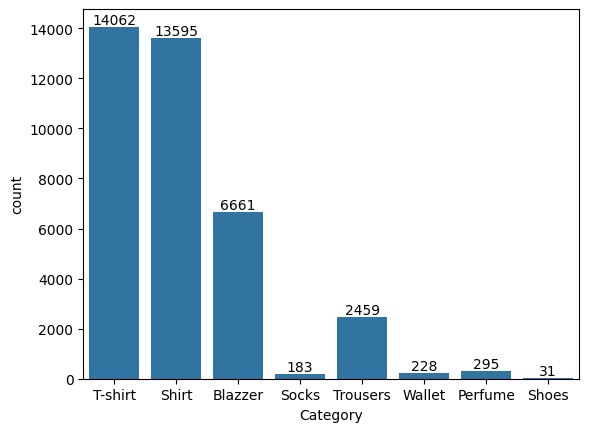

In [19]:
ax = sns.countplot(x = 'Category', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Category', ylabel='Amount'>

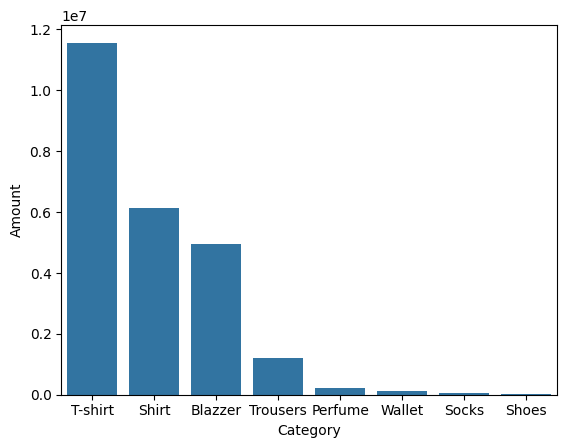

In [20]:
sale_category = df.groupby(['Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x='Category', y='Amount', data=sale_category)

## Location - State

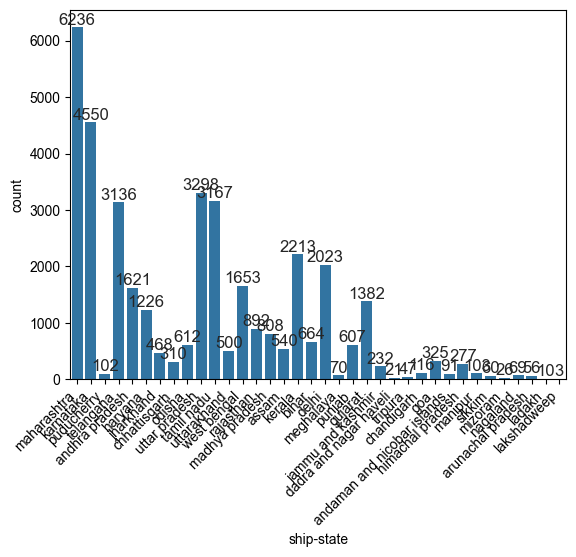

In [21]:
ax = sns.countplot(x='ship-state', data= df)
sns.set(rc={'figure.figsize':(12, 6)})
plt.xticks(rotation=45, ha="right", fontsize=10)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='ship-state', ylabel='Qty'>

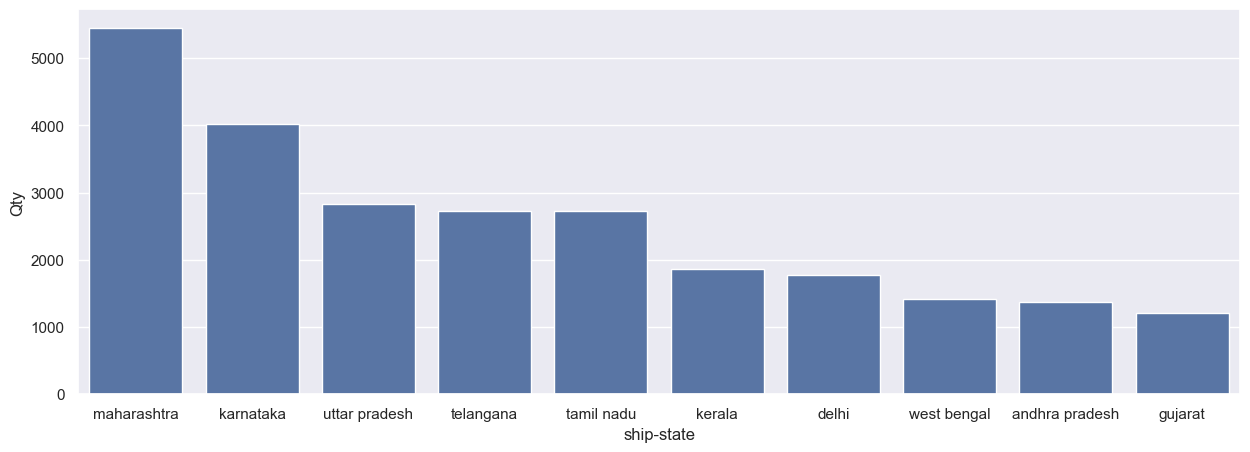

In [22]:
saleState = df.groupby(['ship-state'], as_index=False)['Qty'].sum().sort_values(by = 'Qty', ascending = False).head(10)
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x='ship-state', y= 'Qty', data = saleState)

## Quantity vs Amount

<Axes: xlabel='Amount', ylabel='Qty'>

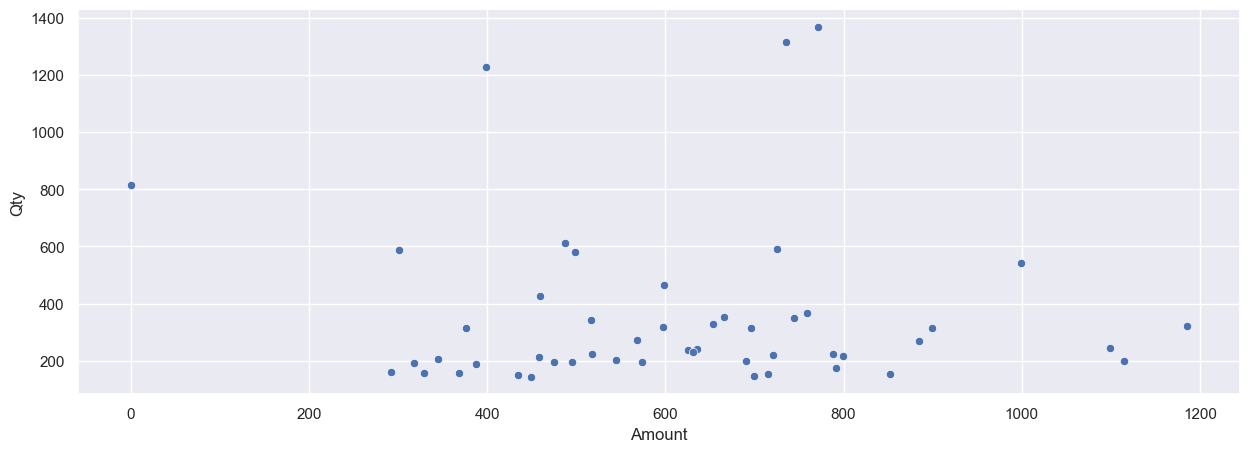

In [23]:
salesAmount = df.groupby(['Amount'], as_index=False)['Qty'].sum().sort_values(by ='Qty', ascending = False).head(50)
sns.scatterplot(x= 'Amount', data=salesAmount, y='Qty')

In [24]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [25]:
df['ship-country'].unique()

array(['IN'], dtype=object)

## Location - City

<Axes: xlabel='ship-city', ylabel='Qty'>

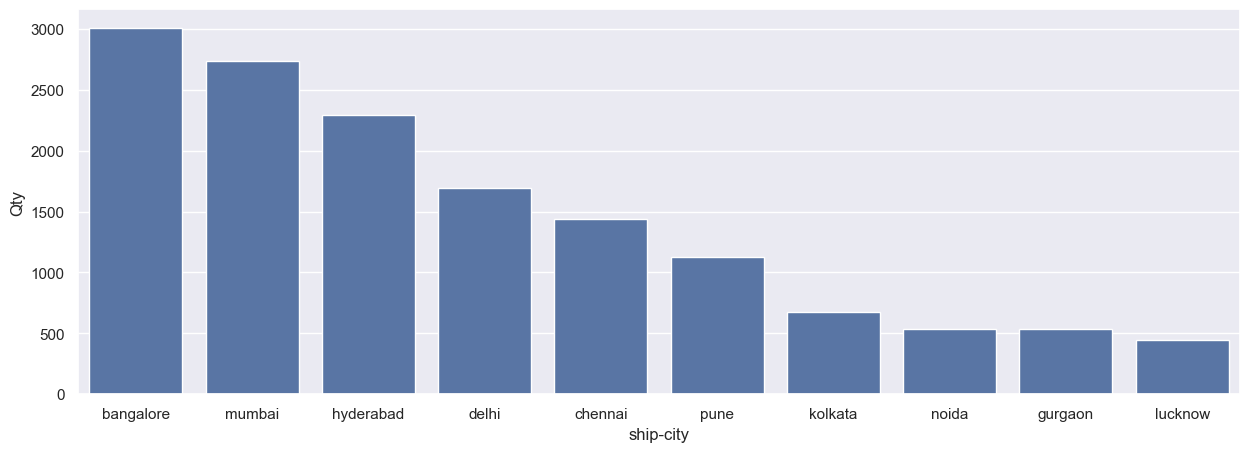

In [27]:
saleCity = df.groupby(['ship-city'], as_index=False)['Qty'].sum().sort_values(by = 'Qty', ascending = False).head(10)
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x='ship-city', y= 'Qty', data = saleCity)

## Monthly Sales

C:\Users\Amir Mustafa Khan\AppData\Local\Temp\ipykernel_21576\1616404666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


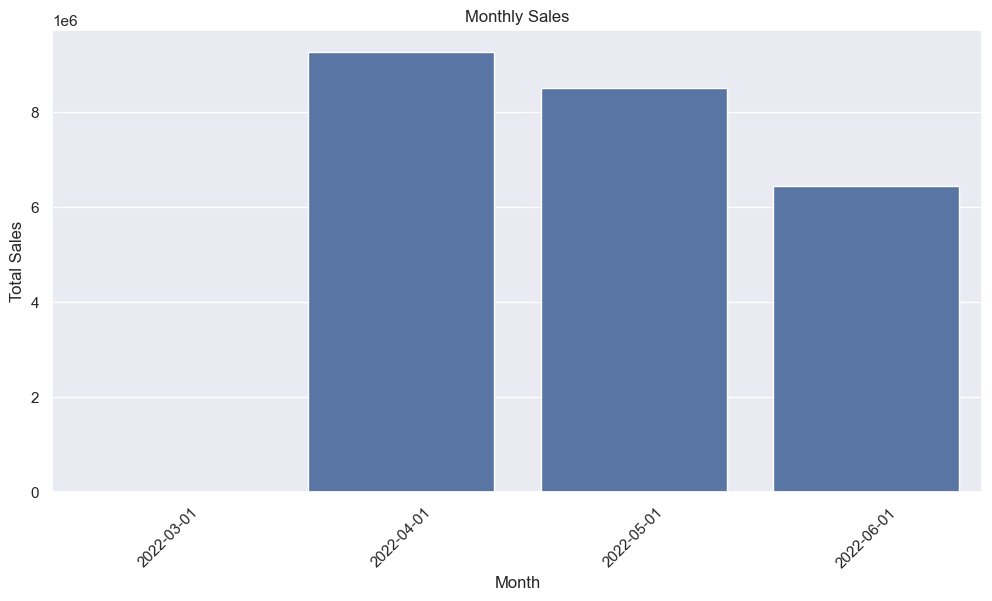

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Amount')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


## Order Status

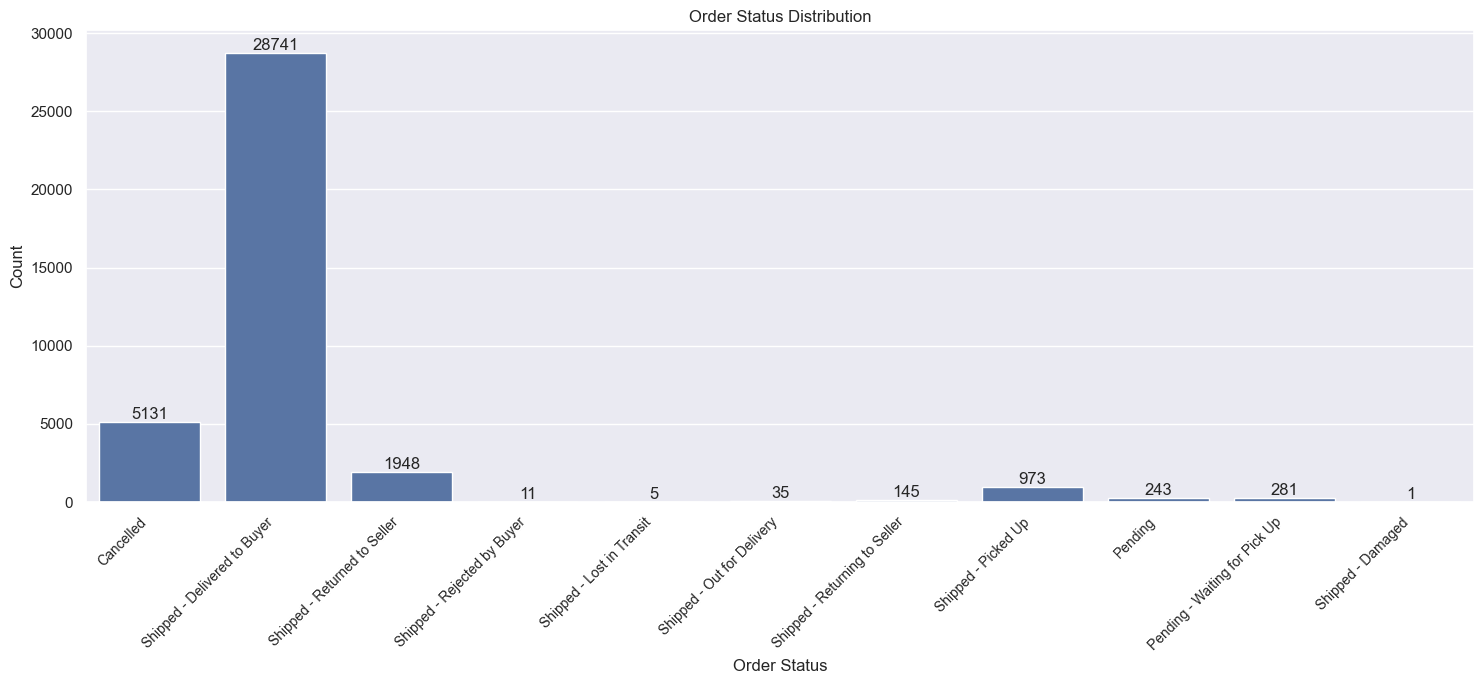

In [32]:
plt.figure(figsize=(15, 7))  

ax = sns.countplot(x='Status', data=df)

plt.xticks(rotation=45, ha="right", fontsize=10)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.tight_layout() 
plt.show()

# Conclusion

#### We can say that Most Amazon Sales was from Bangalore acccording to the sales in city but when analyzed acoording the state the most sales are from Maharashtra in which T-Shirts were sold the most and the Price Range is between INR 600 to INR 800 in the month of April of 2022